In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SWIFT PAT+OBS: Produce figure 8

## I/O data

In [2]:
simulations = {
    'case A0': 'internal.pat.obs.noT',
    'case A1': 'internal.ipa.obs.Tassim',
    'case An': 'internal.ipa.obs.allT',
    'case R': 'internal.pat.wrf',  
}

In [3]:
project_dir_equon = '/projects/mmc/equon/profile_assimilation_obs/'
project_dir_dallaert = '/projects/mmc/dallaert/profile_assimilation_obs/'

In [4]:
save_figures = False
figname_prefix = 'results_A'

## Some definitions

In [5]:
datetimes = [
    '2013-11-08 15:00:00',
    '2013-11-08 18:00:00',
    '2013-11-08 21:00:00',
    '2013-11-09 00:00:00',
    '2013-11-09 03:00:00',
    '2013-11-09 06:00:00',
]

## Prepare environment

In [6]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
# Manually adding path to datatools repository to PYTHONPATH
sys.path.append(os.path.join(os.environ['HOME'],'tools'))

from datatools.SOWFA.postProcessing.sliceDataInstantaneous import read_slice

In [8]:
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize']  = 16
mpl.rcParams['axes.titlesize']  = 16

# Generate figure 8: 2D contours

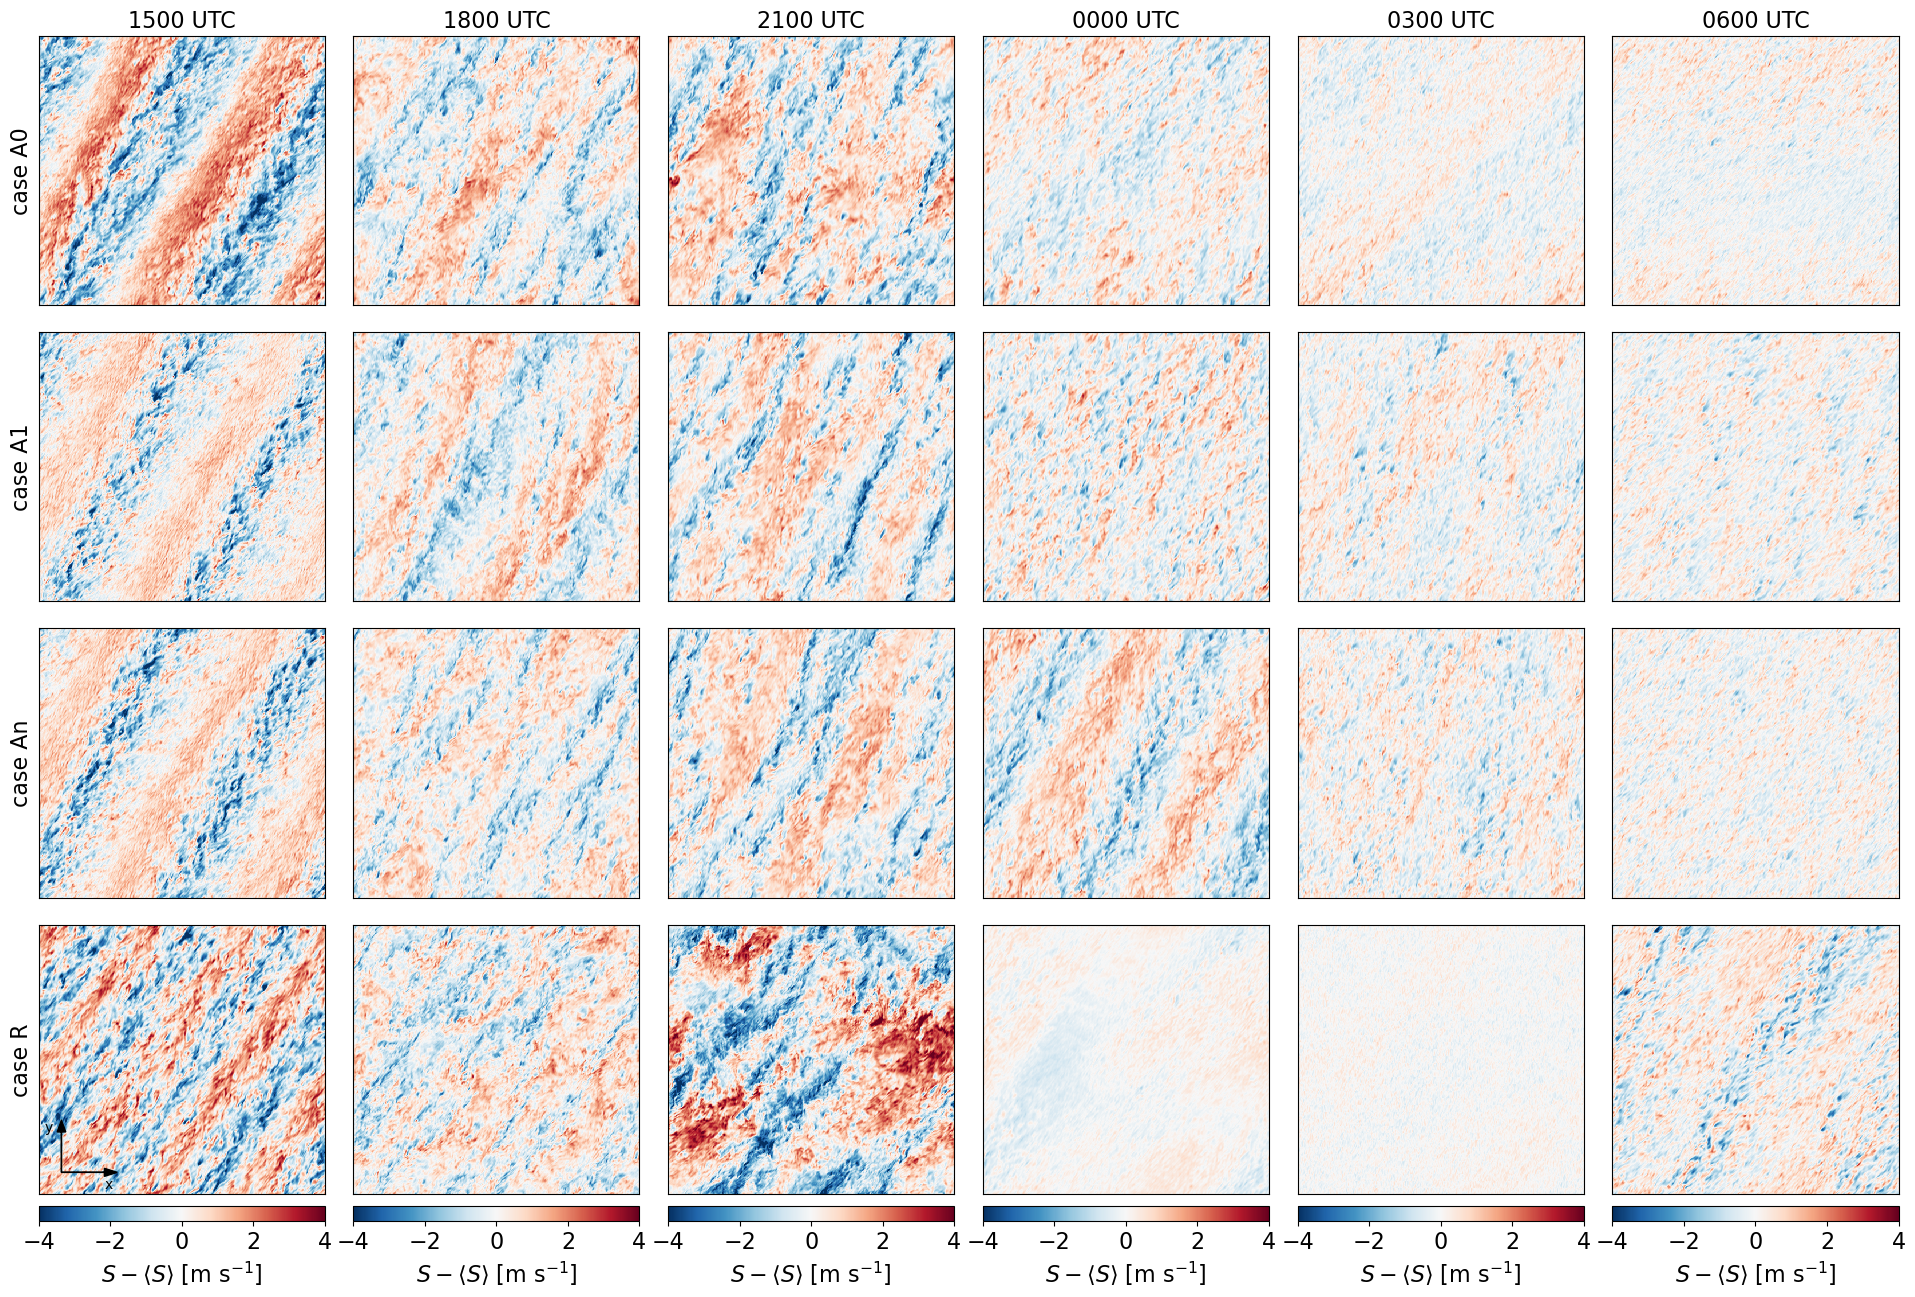

In [9]:
rows = len(simulations)
cols = len(datetimes)

times = ( pd.to_datetime(datetimes) - pd.to_datetime('2013-11-08 00:00:00') ).total_seconds().values

fieldlimits = [4,4,4,4,4,4]

fig, ax = plt.subplots(rows,cols,sharex=True,sharey=True,figsize=(4*cols,4*rows))
fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(hspace=0.1)

plane = 'U_slice_horizontal_120m.vtk'

for row, sim in enumerate(simulations): 
    simdir = 'run.'+simulations[sim]
    if os.path.exists(os.path.join(project_dir_dallaert,simdir)):
        postdir = os.path.join(project_dir_dallaert,simdir,'postProcessing','sliceDataInstantaneous')
    elif os.path.exists(os.path.join(project_dir_equon,simdir)):
        postdir = os.path.join(project_dir_equon,simdir,'postProcessing','sliceDataInstantaneous')
    else:
        print('Did not find path to '+sim)
        continue
        
    ax[row,0].set(ylabel=sim)
    
    for col,time in enumerate(times):
        tstr = r'{}'.format(int(time))
        fpath = os.path.join(postdir,tstr,plane)
        x,U = read_slice(fpath,const='z',verbose=False)
        S = np.sqrt(U[:,:,0]**2 + U[:,:,1]**2)
        im = ax[row,col].pcolormesh(x[:,:,0]/1000,x[:,:,1]/1000,S-np.mean(S),
                                    cmap='RdBu_r',vmin=-fieldlimits[col],vmax=fieldlimits[col],
                                    shading='auto',rasterized=True)
        #print(sim,time,np.min(S-np.mean(S)),np.max(S-np.mean(S)))
        ax[row,col].set_xticks([])
        ax[row,col].set_yticks([])

for col,time in enumerate(times):
    ax[0,col].set(title=pd.to_datetime(datetimes)[col].strftime('%H%M UTC'))
    # Add colorbars to bottom
    cbar = plt.colorbar(ax[0,col].collections[-1],ax=ax[:,col],fraction=0.05, pad=0.01, location='bottom')
    cbar.set_label(r'$S-\langle S\rangle$ [m s$^{-1}$]')
    
ax[-1,0].arrow(0.4,0.4,0.75,0,head_width=0.15, color='black')
ax[-1,0].arrow(0.4,0.4,0,0.75,head_width=0.15, color='black')
ax[-1,0].annotate('x',xy=(1.15,0.1))
ax[-1,0].annotate('y',xy=(0.1,1.15))

if save_figures:
    figname = figname_prefix+'_2D_contours_T'
    plt.savefig(os.path.join('Figures',figname+'.png'),bbox_inches='tight')
    plt.savefig(os.path.join('Figures',figname+'.eps'),bbox_inches='tight')
    plt.savefig(os.path.join('Figures',figname+'.pdf'),bbox_inches='tight')